In [1]:
import pandas as pd
import sys
sys.path.insert(1, '../../')
import prototype_nn as NN
from torch.utils.data import TensorDataset, DataLoader # For mini batches
from simulations import newtons_cooling_law
from torch import from_numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Content

This notebook looks at the overfitting concept: where a training data, is performing better than the test data. This goes through every epoch and compare the differences between the loss given by the training data and the test data. The notebook also explores the affect of batch size and large batch sizes.

## Dataframes

This is looking at the dataframes of the modules

In [2]:
# newtons..
filename_train = "../../data/train/newtons_cooling_law.csv"

In [3]:
newton_train = pd.DataFrame(data= pd.read_csv(filename_train))
newton_test = testing = newtons_cooling_law(delta = 1, simulations = 200 , save = False, initial_paras = np.random.uniform(0, 60, 30))

This is the training dataframe

In [4]:
newton_train.head()

,time,temp,initial_temp
0,0,1.000000,1
1,1,1.312649,1
2,2,1.620644,1
3,3,1.924053,1
4,4,2.222945,1


This is the testing dataframe

In [5]:
newton_test.head()

,time,temp,initial_temp
0,0,20.717885,20.717885
1,1,20.736974,20.717885
2,2,20.755778,20.717885
3,3,20.774302,20.717885
4,4,20.792550,20.717885


This is defining the inputs to put into the neural network, by select the first two columns from the "newton_train" dataframe

In [6]:
inputs = newton_train.iloc[:,[0,1]]
inputs.head()

,time,temp
0,0,1.000000
1,1,1.312649
2,2,1.620644
3,3,1.924053
4,4,2.222945


This is define the targets to put into the neural network, by selecting the 3 columns within the newton train dataframe

In [7]:
targets = newton_train.iloc[:,[1]]
targets.head()

,temp
0,1.000000
1,1.312649
2,1.620644
3,1.924053
4,2.222945


## Defining models

Two models are definied small_batch_model to compare how the test and training loss are affected when the batch size is small. In addition, large_batch_model to compare how the test and training loss are affected when the batch size is large

In [8]:
# lr = 0.001, bs = 32, ts = 50, epoch = 20 
small_batch_large_model = NN.CustomeModel(2, 1, 0.001, [2, 50, 250, 350, 450, 550, 650, 750, 850, 1])
large_batch_large_model = NN.CustomeModel(2, 1, 0.001, [2, 50, 250, 350, 450, 550, 650, 750, 850, 1])
small_batch_small_model = NN.prototype(2, 1, 0.001)
large_batch_small_model = NN.prototype(2, 1, 0.001)
inputs_tensor = from_numpy(inputs.to_numpy(dtype='float32'))
targets_tensor = from_numpy(targets.to_numpy(dtype='float32'))

This is the inputs and targets as tensor

In [9]:
inputs_tensor, targets_tensor

(tensor([[  0.0000,   1.0000],
         [  1.0000,   1.3126],
         [  2.0000,   1.6206],
         ...,
         [197.0000,  23.9790],
         [198.0000,  23.9495],
         [199.0000,  23.9205]]),
 tensor([[ 1.0000],
         [ 1.3126],
         [ 1.6206],
         ...,
         [23.9790],
         [23.9495],
         [23.9205]]))

## Mini batches

We set up a mini batch. The tensor dataset groups our data into tuples, whle the dataloader group it into mini batches

In [10]:
train_dataset = TensorDataset(inputs_tensor, targets_tensor)
small_batch_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
large_batch_loader = DataLoader(dataset=train_dataset, batch_size=512, shuffle=True) 

This would randomise the newton test dataset

In [11]:
newton_rando = newton_test.sample(frac=1)

This is turning the the inputs and targes from the test set into a tensor

In [14]:
test_inputs_tensor = from_numpy(newton_test.iloc[:,[0,1]].to_numpy(dtype='float32'))
test_targets_tensor = from_numpy(newton_test.iloc[:,[1]].to_numpy(dtype='float32'))

## Training 

Training with small batch size

In [15]:
small_batch_small_model_df = small_batch_small_model.train_model(small_batch_loader, 30, test_inputs_tensor, test_targets_tensor)

Epoch: 0  Train Loss: 0.003878817893564701 Test Loss 0.0009543161140754819 
Epoch: 1  Train Loss: 0.001451066229492426 Test Loss 0.00033717683982104063 
Epoch: 2  Train Loss: 0.0015672971494495869 Test Loss 0.0016570755979046226 
Epoch: 3  Train Loss: 0.00042882407433353364 Test Loss 0.00022020345204509795 
Epoch: 4  Train Loss: 0.00021458332776091993 Test Loss 0.0005922801210545003 
Epoch: 5  Train Loss: 0.0006627871189266443 Test Loss 0.0018234108574688435 
Epoch: 6  Train Loss: 0.00047174704377539456 Test Loss 0.00159031234215945 
Epoch: 7  Train Loss: 0.00514770345762372 Test Loss 0.003176185069605708 
Epoch: 8  Train Loss: 0.06216797977685928 Test Loss 0.04129404202103615 
Epoch: 9  Train Loss: 0.00027410051552578807 Test Loss 0.00022578866628464311 
Epoch: 10  Train Loss: 0.0002105419262079522 Test Loss 0.00015621680358890444 
Epoch: 11  Train Loss: 0.14500048756599426 Test Loss 0.11032304167747498 
Epoch: 12  Train Loss: 0.00027917049010284245 Test Loss 0.0005261889891698956 
Ep

Training with a large batch size

In [16]:
large_batch_small_model_df = large_batch_small_model.train_model(large_batch_loader, 30, test_inputs_tensor, test_targets_tensor)

Epoch: 0  Train Loss: 8.8292875289917 Test Loss 12.772339820861816 
Epoch: 1  Train Loss: 1.1917139291763306 Test Loss 0.430084228515625 
Epoch: 2  Train Loss: 0.0869869813323021 Test Loss 0.10081688314676285 
Epoch: 3  Train Loss: 0.02608972229063511 Test Loss 0.042379382997751236 
Epoch: 4  Train Loss: 0.01628248207271099 Test Loss 0.021464506164193153 
Epoch: 5  Train Loss: 0.016976406797766685 Test Loss 0.01652861386537552 
Epoch: 6  Train Loss: 0.013612894341349602 Test Loss 0.015316387638449669 
Epoch: 7  Train Loss: 0.009309275075793266 Test Loss 0.014435208402574062 
Epoch: 8  Train Loss: 0.010951591655611992 Test Loss 0.012031331658363342 
Epoch: 9  Train Loss: 0.011883155442774296 Test Loss 0.011255141347646713 
Epoch: 10  Train Loss: 0.009326865896582603 Test Loss 0.010764052160084248 
Epoch: 11  Train Loss: 0.007419705390930176 Test Loss 0.009897845797240734 
Epoch: 12  Train Loss: 0.0078018843196332455 Test Loss 0.008313105441629887 
Epoch: 13  Train Loss: 0.00629830220714

Training with a small batch and a larger model

In [17]:
small_batch_large_model_df = small_batch_large_model.train_model(small_batch_loader, 30, test_inputs_tensor, test_targets_tensor)

Epoch: 0  Train Loss: 1.6604276895523071 Test Loss 1.8557231426239014 
Epoch: 1  Train Loss: 0.013159393332898617 Test Loss 0.018992869183421135 
Epoch: 2  Train Loss: 0.014431953430175781 Test Loss 0.011288870126008987 
Epoch: 3  Train Loss: 0.006339214742183685 Test Loss 0.011103435419499874 
Epoch: 4  Train Loss: 0.6632745265960693 Test Loss 0.2358744740486145 
Epoch: 5  Train Loss: 83.68628692626953 Test Loss 154.58261108398438 
Epoch: 6  Train Loss: 0.07373543828725815 Test Loss 0.045377038419246674 
Epoch: 7  Train Loss: 0.0015841326676309109 Test Loss 0.0026016468182206154 
Epoch: 8  Train Loss: 0.003727987175807357 Test Loss 0.00040164837264455855 
Epoch: 9  Train Loss: 0.14207808673381805 Test Loss 0.019992196932435036 
Epoch: 10  Train Loss: 0.0003126801166217774 Test Loss 0.0003156980674248189 
Epoch: 11  Train Loss: 0.00015020358841866255 Test Loss 0.00023957566008903086 
Epoch: 12  Train Loss: 0.0015246070688590407 Test Loss 0.001760447514243424 
Epoch: 13  Train Loss: 0.0

Training with a large batch and a large

In [18]:
large_batch_large_model_df = large_batch_large_model.train_model(large_batch_loader, 30, test_inputs_tensor, test_targets_tensor)

Epoch: 0  Train Loss: 17.27108383178711 Test Loss 3.4048407077789307 
Epoch: 1  Train Loss: 1.5405999422073364 Test Loss 0.669199526309967 
Epoch: 2  Train Loss: 0.15147311985492706 Test Loss 0.14391671121120453 
Epoch: 3  Train Loss: 0.054092373698949814 Test Loss 0.05492478609085083 
Epoch: 4  Train Loss: 0.02046528272330761 Test Loss 0.02876375801861286 
Epoch: 5  Train Loss: 0.03260846808552742 Test Loss 0.035402752459049225 
Epoch: 6  Train Loss: 0.020991789177060127 Test Loss 0.022689636796712875 
Epoch: 7  Train Loss: 0.014180304482579231 Test Loss 0.023019885644316673 
Epoch: 8  Train Loss: 0.014118282124400139 Test Loss 0.02461782656610012 
Epoch: 9  Train Loss: 0.011946686543524265 Test Loss 0.014921843074262142 
Epoch: 10  Train Loss: 0.01740896888077259 Test Loss 0.01432187668979168 
Epoch: 11  Train Loss: 0.15168976783752441 Test Loss 0.3141310214996338 
Epoch: 12  Train Loss: 0.04373179003596306 Test Loss 0.030250724405050278 
Epoch: 13  Train Loss: 0.014976007863879204 T

In [23]:
large_batch_large_model_df.head()

,Train,Test
0,17.271084,3.404841
1,1.540600,0.669200
2,0.151473,0.143917
3,0.054092,0.054925
4,0.020465,0.028764


## Graphs

graphs

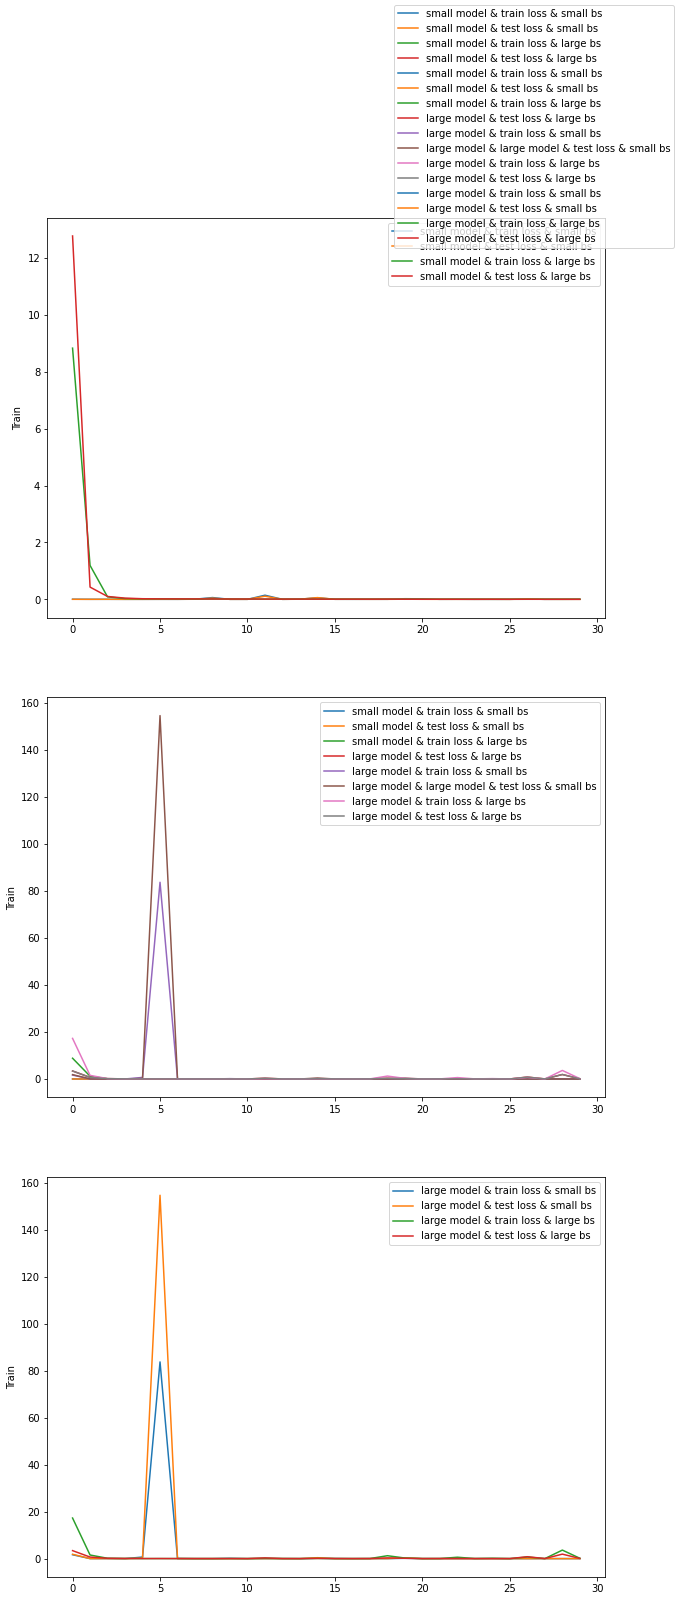

In [22]:
fig, ax = plt.subplots(nrows=3, figsize=(10,25))
sns.lineplot(data=small_batch_small_model_df, x=np.arange(0, 30), y="Train", ax=ax[0], label="small model & train loss & small bs", markers=True)
sns.lineplot(data=small_batch_small_model_df,x=np.arange(0, 30), y="Test", ax=ax[0], label="small model & test loss & small bs" , markers=True)
sns.lineplot(data=large_batch_small_model_df, x=np.arange(0, 30), y="Train", ax=ax[0], label="small model & train loss & large bs", markers=True)
sns.lineplot(data=large_batch_small_model_df,x=np.arange(0, 30), y="Test", ax=ax[0], label="small model & test loss & large bs" , markers=True)

sns.lineplot(data=small_batch_small_model_df, x=np.arange(0, 30), y="Train", ax=ax[1], label="small model & train loss & small bs", markers=True)
sns.lineplot(data=small_batch_small_model_df,x=np.arange(0, 30), y="Test", ax=ax[1], label="small model & test loss & small bs" , markers=True)
sns.lineplot(data=large_batch_small_model_df, x=np.arange(0, 30), y="Train", ax=ax[1], label="small model & train loss & large bs", markers=True)
sns.lineplot(data=large_batch_large_model_df,x=np.arange(0, 30), y="Test", ax=ax[1], label="large model & test loss & large bs" , markers=True)
sns.lineplot(data=small_batch_large_model_df, x=np.arange(0, 30), y="Train", ax=ax[1], label="large model & train loss & small bs", markers=True)
sns.lineplot(data=small_batch_large_model_df,x=np.arange(0, 30), y="Test", ax=ax[1], label="large model & large model & test loss & small bs" , markers=True)
sns.lineplot(data=large_batch_large_model_df, x=np.arange(0, 30), y="Train", ax=ax[1], label="large model & train loss & large bs", markers=True)
sns.lineplot(data=large_batch_large_model_df,x=np.arange(0, 30), y="Test", ax=ax[1], label="large model & test loss & large bs" , markers=True)

sns.lineplot(data=small_batch_large_model_df, x=np.arange(0, 30), y="Train", ax=ax[2], label="large model & train loss & small bs", markers=True)
sns.lineplot(data=small_batch_large_model_df,x=np.arange(0, 30), y="Test", ax=ax[2], label="large model & test loss & small bs" , markers=True)
sns.lineplot(data=large_batch_large_model_df, x=np.arange(0, 30), y="Train", ax=ax[2], label="large model & train loss & large bs", markers=True)
sns.lineplot(data=large_batch_large_model_df,x=np.arange(0, 30), y="Test", ax=ax[2], label="large model & test loss & large bs" , markers=True)

fig.legend()

[(25.0, 30.0), (0.0, 4.0)]

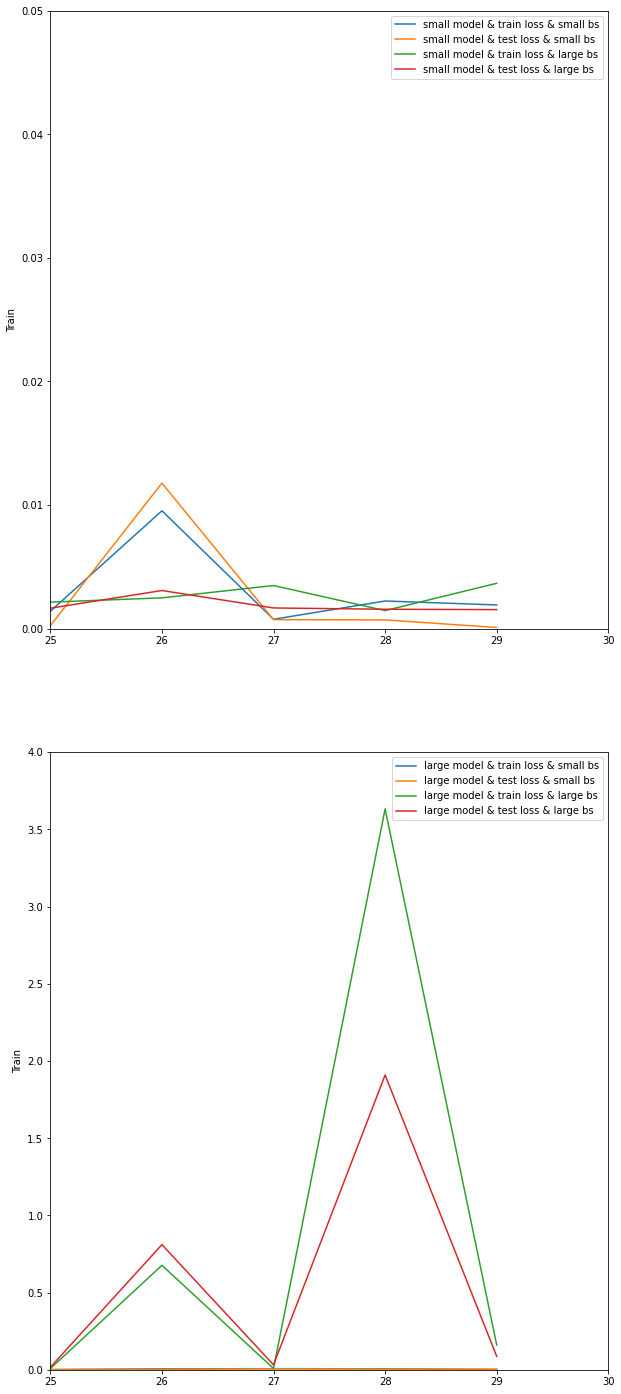

In [27]:
fig, ax = plt.subplots(nrows=2, figsize=(10,25))
sns.lineplot(data=small_batch_small_model_df, x=np.arange(0, 30), y="Train", ax=ax[0], label="small model & train loss & small bs", markers=True)
sns.lineplot(data=small_batch_small_model_df,x=np.arange(0, 30), y="Test", ax=ax[0], label="small model & test loss & small bs" , markers=True)
sns.lineplot(data=large_batch_small_model_df, x=np.arange(0, 30), y="Train", ax=ax[0], label="small model & train loss & large bs", markers=True)
sns.lineplot(data=large_batch_small_model_df,x=np.arange(0, 30), y="Test", ax=ax[0], label="small model & test loss & large bs" , markers=True)
ax[0].set(xlim = (25, 30), ylim = (0,0.05))

sns.lineplot(data=small_batch_large_model_df, x=np.arange(0, 30), y="Train", ax=ax[1], label="large model & train loss & small bs", markers=True)
sns.lineplot(data=small_batch_large_model_df,x=np.arange(0, 30), y="Test", ax=ax[1], label="large model & test loss & small bs" , markers=True)
sns.lineplot(data=large_batch_large_model_df, x=np.arange(0, 30), y="Train", ax=ax[1], label="large model & train loss & large bs", markers=True)
sns.lineplot(data=large_batch_large_model_df,x=np.arange(0, 30), y="Test", ax=ax[1], label="large model & test loss & large bs" , markers=True)
ax[1].set(xlim = (25, 30), ylim = (0,4))
